In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import warnings
warnings.filterwarnings(action='ignore')
%matplotlib inline

In [28]:
df=pd.read_csv("C:\\Users\\dalal\\Downloads\\bank_data.csv")
df

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540000,Level 0 Recovery,19,Male
1,1150,486,416.090000,Level 0 Recovery,25,Female
2,380,527,429.350000,Level 0 Recovery,27,Male
3,1838,536,296.990000,Level 0 Recovery,25,Male
4,1995,541,346.385000,Level 0 Recovery,34,Male
...,...,...,...,...,...,...
1877,361,9785,15388.195990,Level 4 Recovery,65,Female
1878,196,9857,9709.909257,Level 4 Recovery,68,Female
1879,313,9859,30209.181790,Level 4 Recovery,58,Female
1880,1781,9920,20386.232190,Level 4 Recovery,67,Female


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1882 entries, 0 to 1881
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1882 non-null   int64  
 1   expected_recovery_amount  1882 non-null   int64  
 2   actual_recovery_amount    1882 non-null   float64
 3   recovery_strategy         1882 non-null   object 
 4   age                       1882 non-null   int64  
 5   sex                       1882 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 88.3+ KB


In [30]:
df.head()

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540,Level 0 Recovery,19,Male
1,1150,486,416.090,Level 0 Recovery,25,Female
2,380,527,429.350,Level 0 Recovery,27,Male
3,1838,536,296.990,Level 0 Recovery,25,Male
4,1995,541,346.385,Level 0 Recovery,34,Male


In [31]:
df.tail()

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
1877,361,9785,15388.195990,Level 4 Recovery,65,Female
1878,196,9857,9709.909257,Level 4 Recovery,68,Female
1879,313,9859,30209.181790,Level 4 Recovery,58,Female
1880,1781,9920,20386.232190,Level 4 Recovery,67,Female
1881,522,9964,16706.305920,Level 4 Recovery,53,Male


In [32]:
df.columns

Index(['id', 'expected_recovery_amount', 'actual_recovery_amount',
       'recovery_strategy', 'age', 'sex'],
      dtype='object')

In [33]:
df.describe()

,id,expected_recovery_amount,actual_recovery_amount,age
count,1882.000000,1882.000000,1882.000000,1882.000000
mean,1035.596174,2759.967588,4000.967837,39.650372
std,591.458429,2019.826565,4576.506350,15.453072
min,6.000000,194.000000,200.425000,18.000000
25%,534.250000,1261.250000,1045.190300,28.000000
50%,1029.500000,2062.000000,2115.446373,35.000000
75%,1551.750000,3569.500000,5417.237207,50.000000
max,2056.000000,9964.000000,34398.479710,84.000000


In [34]:
df.isnull().sum()

id                          0
expected_recovery_amount    0
actual_recovery_amount      0
recovery_strategy           0
age                         0
sex                         0
dtype: int64

<AxesSubplot:>

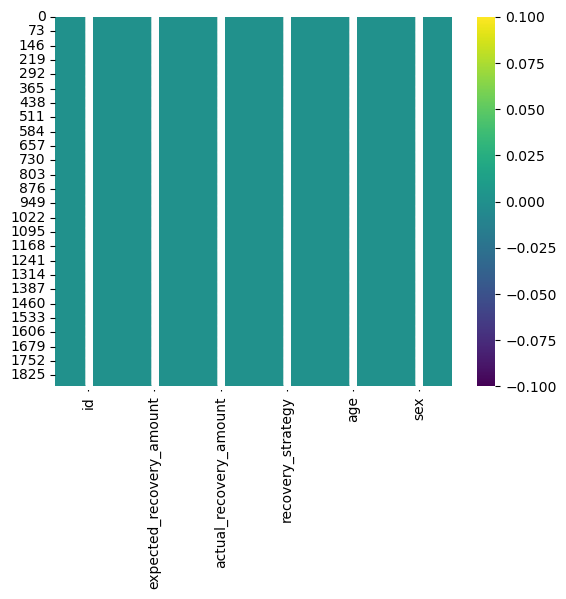

In [35]:
sns.heatmap(df.isnull(),annot=True,cmap='viridis')

<AxesSubplot:>

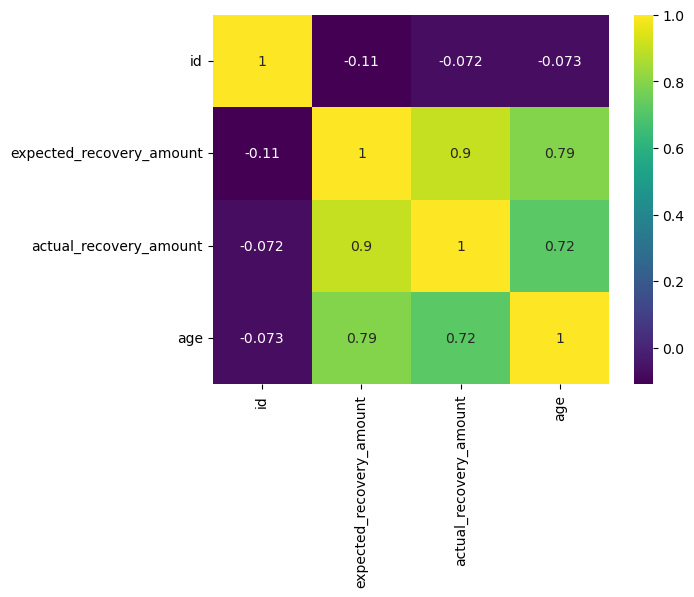

In [36]:
df1=df.select_dtypes(include=np.number)
sns.heatmap(df1.corr(),annot=True,cmap='viridis')

In [37]:
df[df.duplicated()]

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex


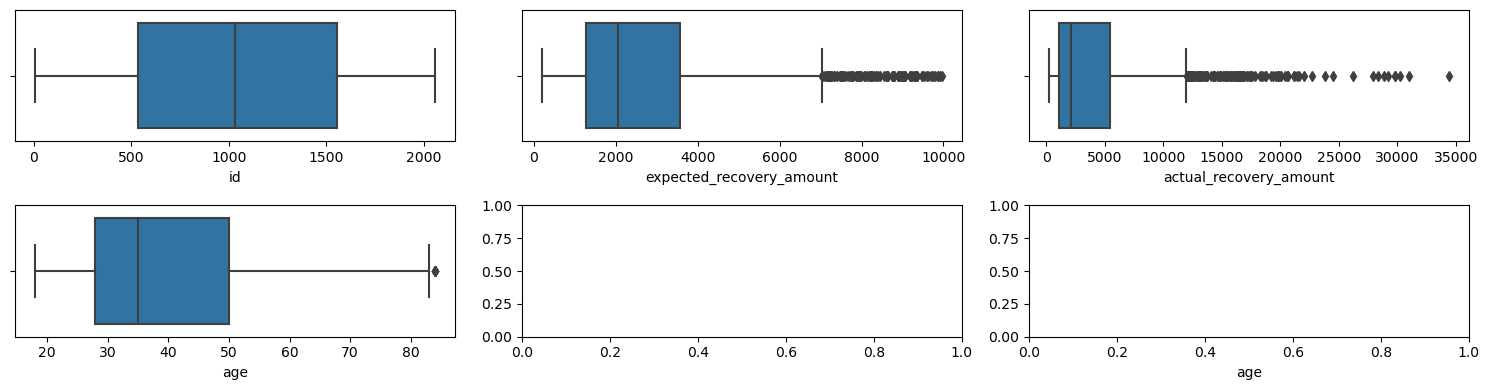

In [39]:
fig,ax=plt.subplots(2,3,figsize=(15,4))
for variable,subplots in zip(df1.columns,ax.flatten()):
    sns.boxplot(df1[variable],ax=subplots)
    plt.xlabel(variable)
    plt.tight_layout()
plt.show()

In [ ]:
#outlier removal

In [41]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr=q3-q3
l1=q1-(1.5*iqr)
u1=q3+(1.5*iqr)
df2=df[~((df<l1)|(df>u1)).any(axis=1)]
df2

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
471,1279,1262,1494.057824,Level 1 Recovery,31,Female
472,1400,1264,1404.864225,Level 1 Recovery,38,Female
479,1352,1273,1329.835794,Level 1 Recovery,30,Male
480,1176,1275,1223.964818,Level 1 Recovery,29,Male
481,1224,1276,1131.371171,Level 1 Recovery,42,Female
...,...,...,...,...,...,...
1380,686,3442,3184.085734,Level 3 Recovery,41,Female
1383,838,3447,5271.882496,Level 3 Recovery,41,Female
1391,550,3510,4815.822822,Level 3 Recovery,41,Female
1400,889,3537,2803.108635,Level 3 Recovery,46,Female


In [42]:
df

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540000,Level 0 Recovery,19,Male
1,1150,486,416.090000,Level 0 Recovery,25,Female
2,380,527,429.350000,Level 0 Recovery,27,Male
3,1838,536,296.990000,Level 0 Recovery,25,Male
4,1995,541,346.385000,Level 0 Recovery,34,Male
...,...,...,...,...,...,...
1877,361,9785,15388.195990,Level 4 Recovery,65,Female
1878,196,9857,9709.909257,Level 4 Recovery,68,Female
1879,313,9859,30209.181790,Level 4 Recovery,58,Female
1880,1781,9920,20386.232190,Level 4 Recovery,67,Female


In [ ]:
#univariate analysis

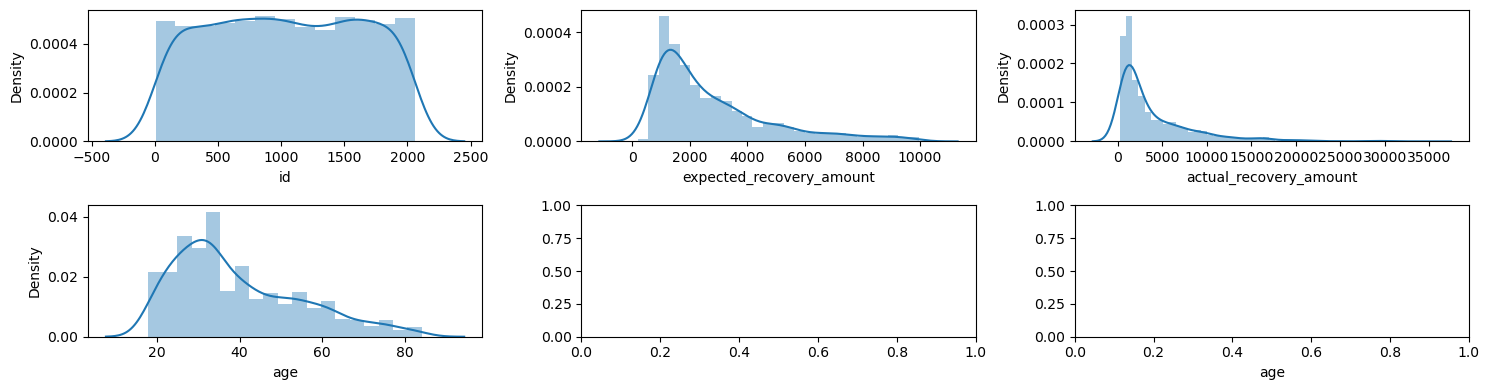

In [38]:
fig,ax=plt.subplots(2,3,figsize=(15,4))
for variable,subplots in zip(df1.columns,ax.flatten()):
    sns.distplot(df1[variable],ax=subplots)
    plt.xlabel(variable)
    plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='recovery_strategy', ylabel='count'>

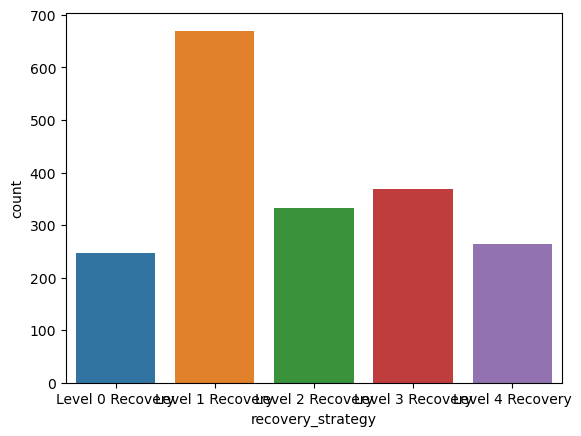

In [43]:
sns.countplot(df['recovery_strategy'])

<AxesSubplot:xlabel='sex', ylabel='count'>

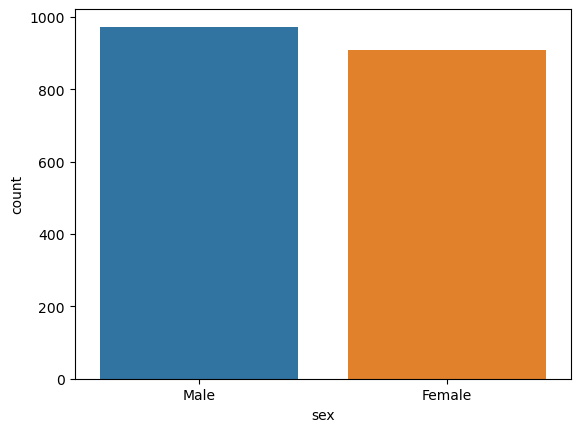

In [44]:
sns.countplot(df['sex'])

In [ ]:
#bivariate analysis

<AxesSubplot:xlabel='age', ylabel='expected_recovery_amount'>

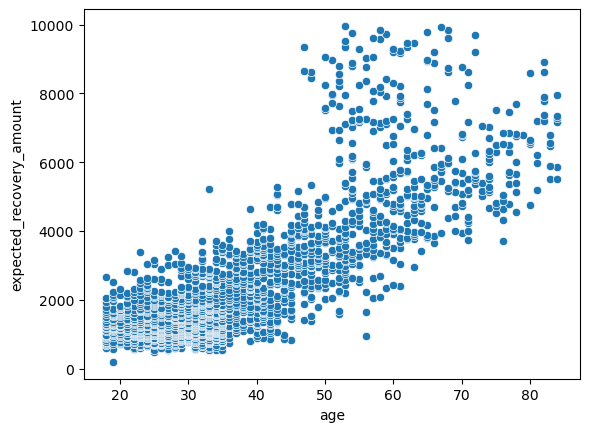

In [46]:
sns.scatterplot(df['age'],df['expected_recovery_amount'])

<AxesSubplot:xlabel='age', ylabel='actual_recovery_amount'>

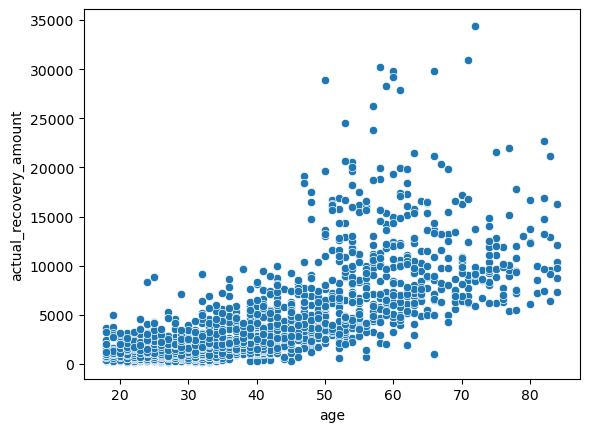

In [47]:
sns.scatterplot(df['age'],df['actual_recovery_amount'])

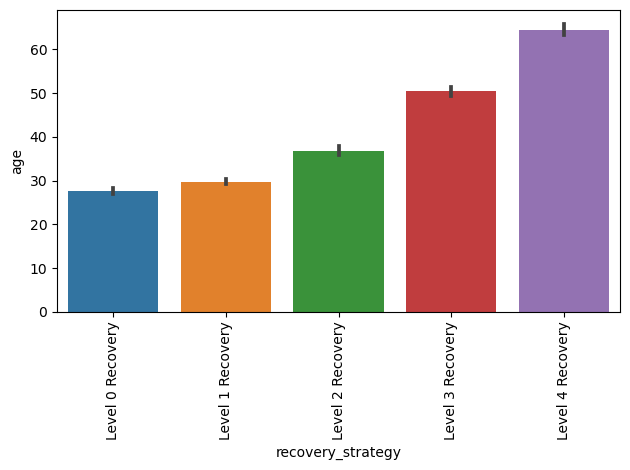

In [52]:
sns.barplot(y=df['age'],x=df['recovery_strategy'])
plt.xticks(rotation=90)
plt.tight_layout()

In [56]:
df

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540000,Level 0 Recovery,19,Male
1,1150,486,416.090000,Level 0 Recovery,25,Female
2,380,527,429.350000,Level 0 Recovery,27,Male
3,1838,536,296.990000,Level 0 Recovery,25,Male
4,1995,541,346.385000,Level 0 Recovery,34,Male
...,...,...,...,...,...,...
1877,361,9785,15388.195990,Level 4 Recovery,65,Female
1878,196,9857,9709.909257,Level 4 Recovery,68,Female
1879,313,9859,30209.181790,Level 4 Recovery,58,Female
1880,1781,9920,20386.232190,Level 4 Recovery,67,Female


In [61]:
df.groupby('sex')['recovery_strategy'].value_counts()

sex     recovery_strategy
Female  Level 1 Recovery     316
        Level 3 Recovery     188
        Level 2 Recovery     169
        Level 4 Recovery     128
        Level 0 Recovery     108
Male    Level 1 Recovery     354
        Level 3 Recovery     180
        Level 2 Recovery     164
        Level 0 Recovery     139
        Level 4 Recovery     136
Name: recovery_strategy, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='actual_recovery_amount'>

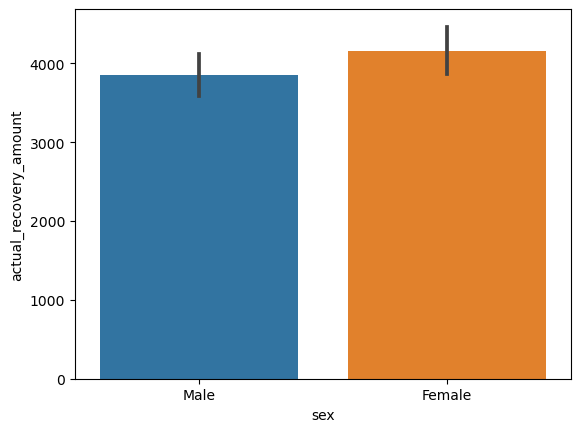

In [62]:
sns.barplot(df['sex'],df['actual_recovery_amount'])

<AxesSubplot:xlabel='sex', ylabel='expected_recovery_amount'>

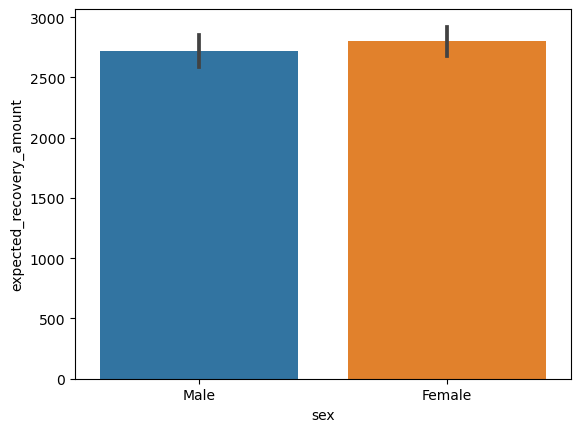

In [63]:
sns.barplot(df['sex'],df['expected_recovery_amount'])

In [ ]:
#statistical tests

In [64]:
df['age'].corr(df['actual_recovery_amount'])

0.7160067539341631

In [ ]:
#hence age and actual recovery amount have a strong correlation

In [ ]:
#Statistical test: age vs. expected recovery amount

In [73]:
from scipy import stats
threshold = 1000
lower_range = 900
upper_range = 1100

above_range = df[(df['expected_recovery_amount'] > threshold) & (df['expected_recovery_amount'] <= upper_range)]
below_range = df[(df['expected_recovery_amount'] >= lower_range) & (df['expected_recovery_amount'] < threshold)]


t_statistic, p_value = stats.ttest_ind(above_range['age'], below_range['age'],equal_var=False)
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the average age of customers above and below the threshold range.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the average age of customers above and below the threshold range.")

T-statistic: 1.60851938268542
P-value: 0.10951368078691735
Fail to reject the null hypothesis: There is no significant difference in the average age of customers above and below the threshold range.


In [105]:
#Statistical test: sex vs. expected recovery amount

In [87]:
threshold = 1000
lower_range = 900
upper_range = 1100

above_range = df[(df['expected_recovery_amount'] > threshold) & (df['expected_recovery_amount'] <= upper_range)]
below_range = df[(df['expected_recovery_amount'] >= lower_range) & (df['expected_recovery_amount'] < threshold)]

In [99]:
a1=above_range[above_range['sex']=='Male']['sex'].count()
a1

55

In [100]:
b1=above_range['sex'].count()
b1

95

In [101]:
a2=below_range[below_range['sex']=='Male']['sex'].count()
a2

56

In [102]:
b2=below_range['sex'].count()
b2

88

In [104]:
z_prop, p_val = sm.stats.proportions_ztest(count = np.array([a1,a2]), 
                                             nobs = np.array([b1,b2]),  
                                             alternative = 'smaller')
if p_value < 0.05:
    print("Within the specified range, there is a significant difference in the percentage of male customers.")
else:
    print("Within the specified range, there is no significant difference in the percentage of male customers.")

Within the specified range, there is no significant difference in the percentage of male customers.


In [106]:
#Exploratory graphical analysis: recovery amount

In [107]:
# Expected Recovery Amounts between $900 to $1100

In [111]:
m1=df[((df['expected_recovery_amount']>=900)&(df['expected_recovery_amount']<=1100))]
m1

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
158,520,900,504.790000,Level 0 Recovery,34,Male
159,1036,900,539.535000,Level 0 Recovery,34,Female
160,1383,900,554.745000,Level 0 Recovery,24,Male
161,998,901,887.005000,Level 0 Recovery,32,Male
162,1351,903,667.035000,Level 0 Recovery,28,Male
...,...,...,...,...,...,...
337,1664,1096,2053.290126,Level 1 Recovery,18,Female
338,302,1098,876.997775,Level 1 Recovery,34,Male
339,554,1098,1836.918718,Level 1 Recovery,26,Female
340,1501,1099,1277.630578,Level 1 Recovery,42,Female


<AxesSubplot:xlabel='expected_recovery_amount', ylabel='actual_recovery_amount'>

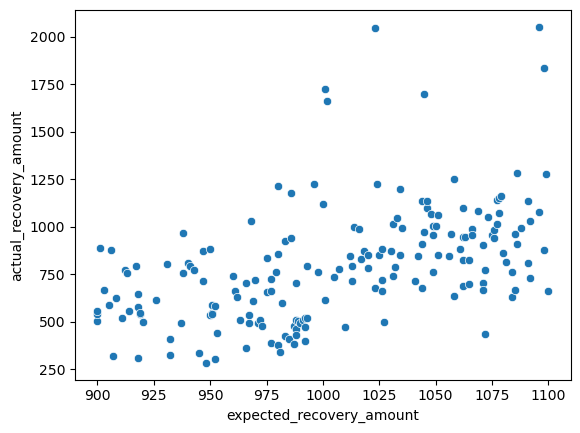

In [112]:
sns.scatterplot(m1['expected_recovery_amount'],m1['actual_recovery_amount'])

In [113]:
import pandas as pd
from scipy.stats import kruskal

# Load your data
# Assuming your data is stored in a DataFrame called 'df'

# Create subsets for the specified ranges
subset_range_1 = df[(df['expected_recovery_amount'] >= 900) & (df['expected_recovery_amount'] <= 1100)]
subset_range_2 = df[(df['expected_recovery_amount'] >= 950) & (df['expected_recovery_amount'] <= 1050)]

# Split the subsets by whether actual recovery amount is above or below $1000 threshold
subset_range_1['above_threshold'] = subset_range_1['actual_recovery_amount'] > 1000
subset_range_2['above_threshold'] = subset_range_2['actual_recovery_amount'] > 1000

# Perform Kruskal-Wallis test for the subsets
kw_stat_1, p_value_1 = kruskal(subset_range_1[subset_range_1['above_threshold']]['actual_recovery_amount'],
                               subset_range_1[~subset_range_1['above_threshold']]['actual_recovery_amount'])

kw_stat_2, p_value_2 = kruskal(subset_range_2[subset_range_2['above_threshold']]['actual_recovery_amount'],
                               subset_range_2[~subset_range_2['above_threshold']]['actual_recovery_amount'])

# Print the results for range 1
print("Kruskal-Wallis Statistic (Range 1):", kw_stat_1)
print("P-value (Range 1):", p_value_1)

if p_value_1 < 0.05:
    print("In the range $900 to $1100, there is evidence of a discontinuity in actual recovery amount.")
else:
    print("In the range $900 to $1100, there is no evidence of a discontinuity in actual recovery amount.")

# Print the results for range 2
print("Kruskal-Wallis Statistic (Range 2):", kw_stat_2)
print("P-value (Range 2):", p_value_2)

if p_value_2 < 0.05:
    print("In the range $950 to $1050, there is evidence of a discontinuity in actual recovery amount.")
else:
    print("In the range $950 to $1050, there is no evidence of a discontinuity in actual recovery amount.")

Kruskal-Wallis Statistic (Range 1): 86.39999999999998
P-value (Range 1): 1.4698491909328642e-20
In the range $900 to $1100, there is evidence of a discontinuity in actual recovery amount.
Kruskal-Wallis Statistic (Range 2): 45.71287128712868
P-value (Range 2): 1.3692012720142221e-11
In the range $950 to $1050, there is evidence of a discontinuity in actual recovery amount.


In [ ]:
#Statistical analysis: recovery amount

In [ ]:
#Regression modeling: no threshold

In [115]:
import statsmodels.formula.api as sfa

model =sfa.ols("actual_recovery_amount~expected_recovery_amount", data=df).fit() #"Sales~Radio" means y~x,i.e y is a function of x,y i.e dependent
#always on left and independent i.e radio always on right
model.summary() #Prob (F-statistic) means p-value

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     actual_recovery_amount   R-squared:                       0.817
Model:                                OLS   Adj. R-squared:                  0.817
Method:                     Least Squares   F-statistic:                     8378.
Date:                    Wed, 23 Aug 2023   Prob (F-statistic):               0.00
Time:                            01:13:31   Log-Likelihood:                -16936.
No. Observations:                    1882   AIC:                         3.388e+04
Df Residuals:                        1880   BIC:                         3.389e+04
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1650.4994     76.506    -21.573      0.000   -1800.545   -1500.454
expected_recovery_amount     2.0477      0.022     91.530      0.000       2.004       2.092
==============================================================================
Omnibus:                     1477.262   Durbin-Watson:                   2.090
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            77458.302
Skew:                           3.224   Prob(JB):                         0.00
Kurtosis:                      33.761   Cond. No.                     5.79e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.79e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""